In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

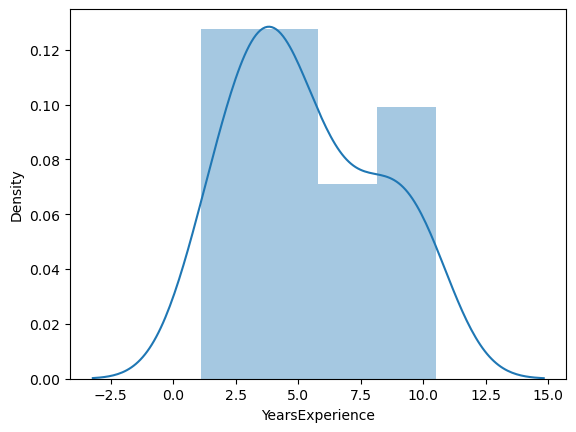

In [4]:
sns.distplot(data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

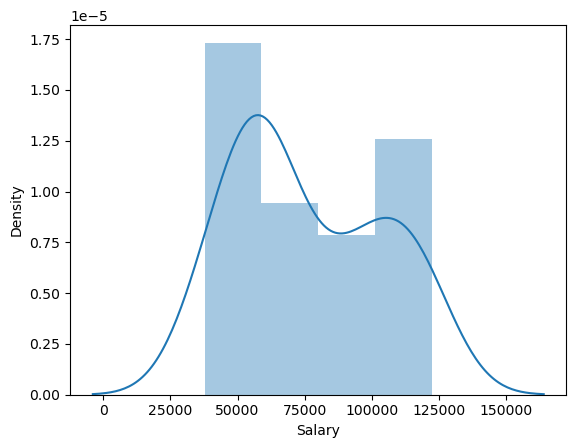

In [5]:
sns.distplot(data['Salary'])

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

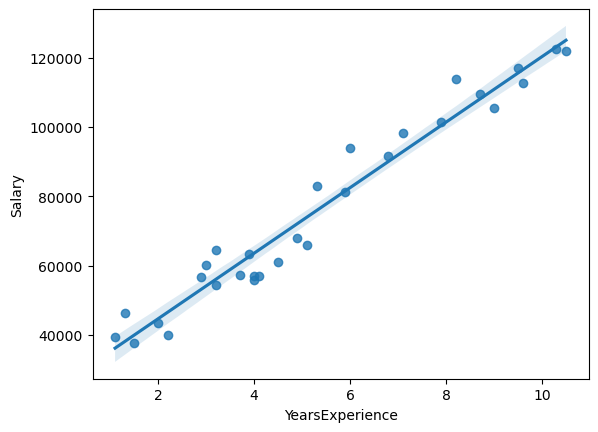

In [7]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [10]:
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Logrithm Transformation Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [13]:
predict_reg = LinearRegression()

In [14]:
X_log = np.log(data['YearsExperience'].values.reshape(-1,1))
y_log = data['Salary'].values.reshape(-1,1)

In [15]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [16]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [17]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [16808.04207062]
Co-efficient Value of Log Model is :  [[39297.91674992]]


In [18]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [19]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


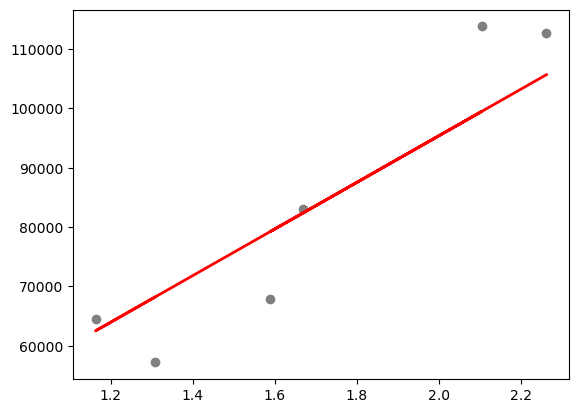

In [22]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

# Quadratic Transformation Model

In [23]:
data['Square_YearsExperience']= data.apply(lambda row: row.YearsExperience**2,axis=1 )
data.head()

,YearsExperience,Salary,Square_YearsExperience
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [24]:
X_q = data.iloc[:,data.columns != 'Salary']
Y_q = data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
print(" Intercept value of Model is " ,model.intercept_)
coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  27285.66834967611
                        Coefficient
YearsExperience         8497.965462
Square_YearsExperience    80.620847


In [27]:
y_pred_q_q = model.predict(X_test)

In [28]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
27,112635.0,116296.154089
15,67938.0,70861.405662
23,113812.0,102389.930923
17,83088.0,74589.524904
8,64445.0,55304.715307


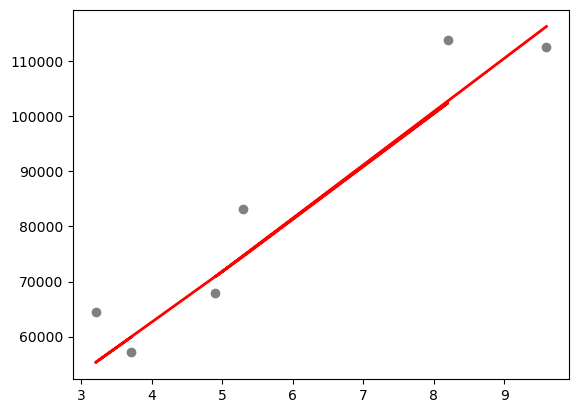

In [29]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

# Exponential Transformation Model

In [30]:
X_e_log = data['YearsExperience'].values.reshape(-1,1)
y_e_log = np.log(data['Salary'].values.reshape(-1,1))

In [31]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [32]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [33]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [10.48525073]
 Exponent model Coefficient value is  [[0.12704681]]


In [34]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

In [35]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,11.631908,11.704900
1,11.126351,11.107780
2,11.642303,11.527035
3,11.327656,11.158599
4,11.073567,10.891801
5,10.954117,10.955324


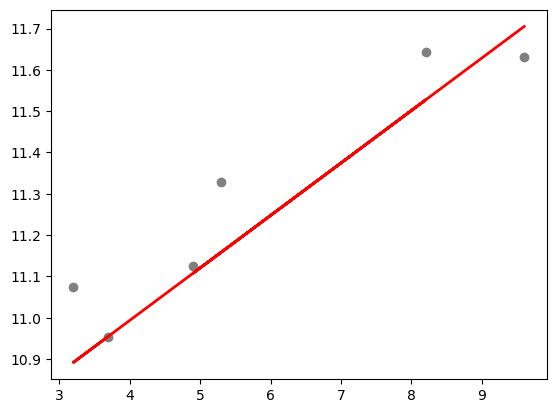

In [36]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

# Polynomial Transformation Model

In [37]:
data['Cube_YearsExperience'] = data.apply(lambda row: row.YearsExperience**3, axis =1 )
data.head()

,YearsExperience,Salary,Square_YearsExperience,Cube_YearsExperience
0,1.1,39343.0,1.21,1.331
1,1.3,46205.0,1.69,2.197
2,1.5,37731.0,2.25,3.375
3,2.0,43525.0,4.00,8.000
4,2.2,39891.0,4.84,10.648


In [38]:
X_c = data.iloc[:,data.columns != 'Salary']
Y_c = data.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [39]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [40]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  39184.07247042661
                        Coefficient
YearsExperience        -1123.219163
Square_YearsExperience  2094.576996
Cube_YearsExperience    -118.359093


In [41]:
y_pred_cube = cube_model.predict(X_test_c)

In [42]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
27,112635.0,116720.834043
15,67938.0,70046.263323
23,113812.0,105553.616210
17,83088.0,74446.732048
8,64445.0,53159.848830


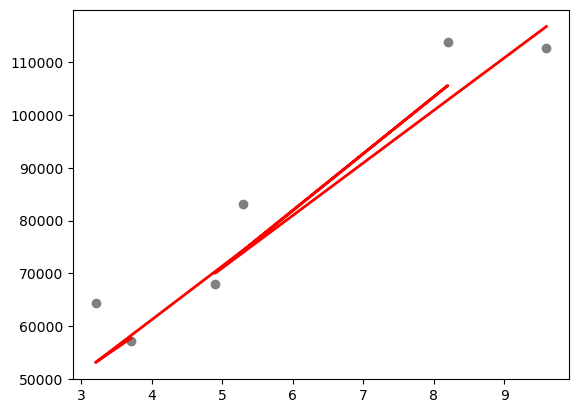

In [43]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

# Model Building & prediction

In [46]:
import statsmodels.formula.api as smf

In [47]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [48]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [49]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [50]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [51]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [52]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [53]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [54]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64